<a href="https://colab.research.google.com/github/sana9524/Data_Science/blob/main/Naivebayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [2]:
path = r"/content/SalaryData_Train.csv"
path1 = r"/content/SalaryData_Test.csv"

In [3]:
train_data = pd.read_csv(path)
test_data = pd.read_csv(path1)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [6]:
train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
test_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [8]:
train_data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [9]:
test_data.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [10]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Private'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Local-gov'),
  Text(3, 0, ' State-gov'),
  Text(4, 0, ' Self-emp-inc'),
  Text(5, 0, ' Federal-gov'),
  Text(6, 0, ' Without-pay')])

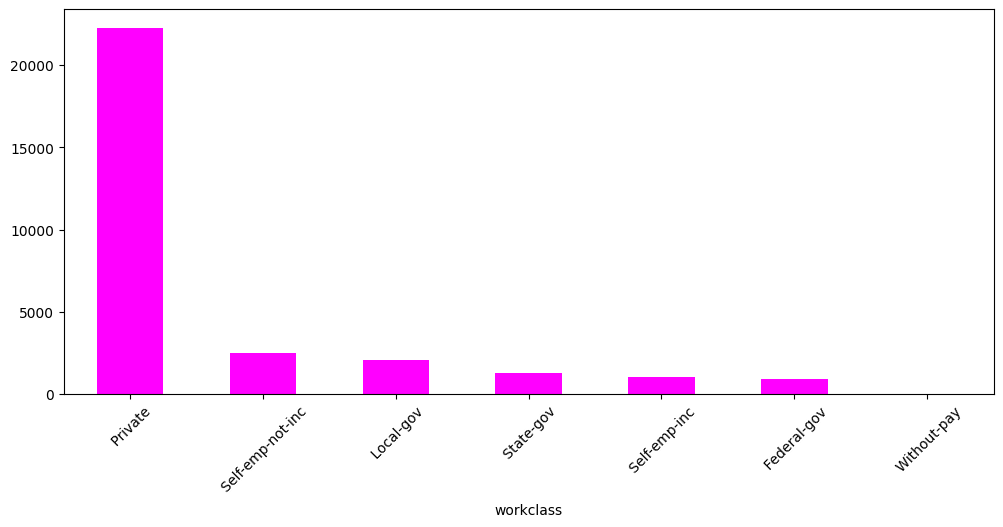

In [12]:
# Work class
plt.figure(figsize=(12,5))
train_data.workclass.value_counts().plot.bar(color='magenta')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Never-married'),
  Text(2, 0, ' Divorced'),
  Text(3, 0, ' Separated'),
  Text(4, 0, ' Widowed'),
  Text(5, 0, ' Married-spouse-absent'),
  Text(6, 0, ' Married-AF-spouse')])

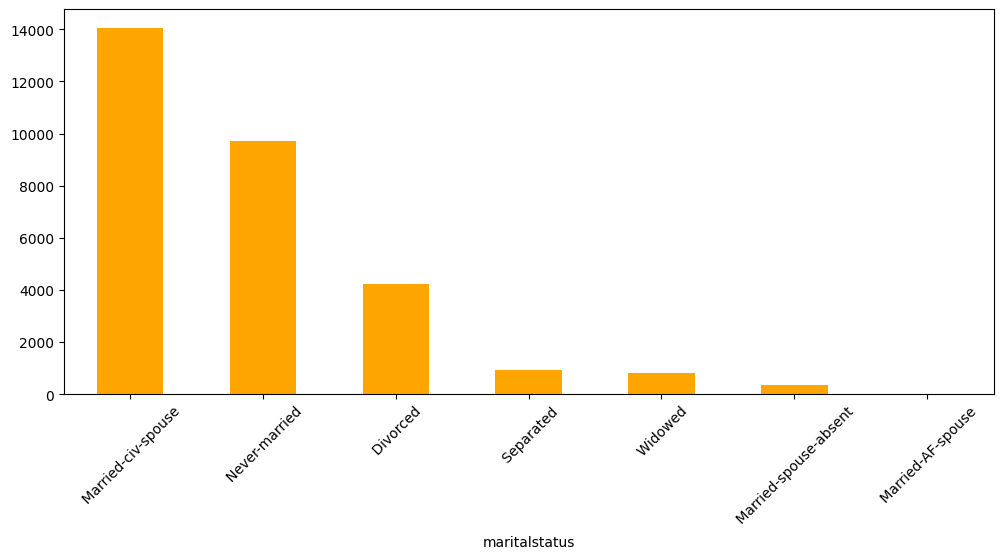

In [13]:

# Martial Status
plt.figure(figsize=(12,5))
train_data.maritalstatus.value_counts().plot.bar(color='orange')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Prof-specialty'),
  Text(1, 0, ' Craft-repair'),
  Text(2, 0, ' Exec-managerial'),
  Text(3, 0, ' Adm-clerical'),
  Text(4, 0, ' Sales'),
  Text(5, 0, ' Other-service'),
  Text(6, 0, ' Machine-op-inspct'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Handlers-cleaners'),
  Text(9, 0, ' Farming-fishing'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Priv-house-serv'),
  Text(13, 0, ' Armed-Forces')])

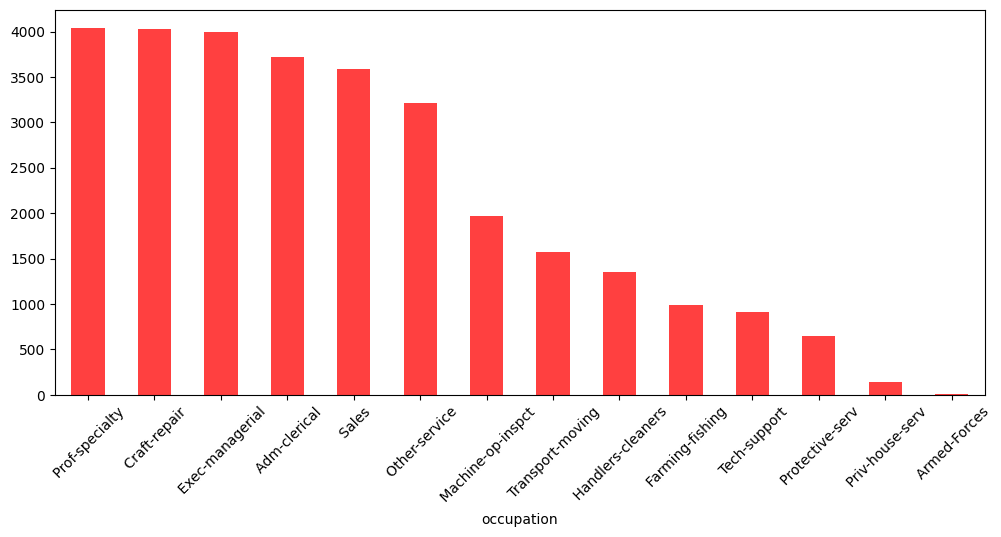

In [14]:
# Occupation
plt.figure(figsize=(12,5))
train_data.occupation.value_counts().plot.bar(color='#FF4040')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Own-child'),
  Text(3, 0, ' Unmarried'),
  Text(4, 0, ' Wife'),
  Text(5, 0, ' Other-relative')])

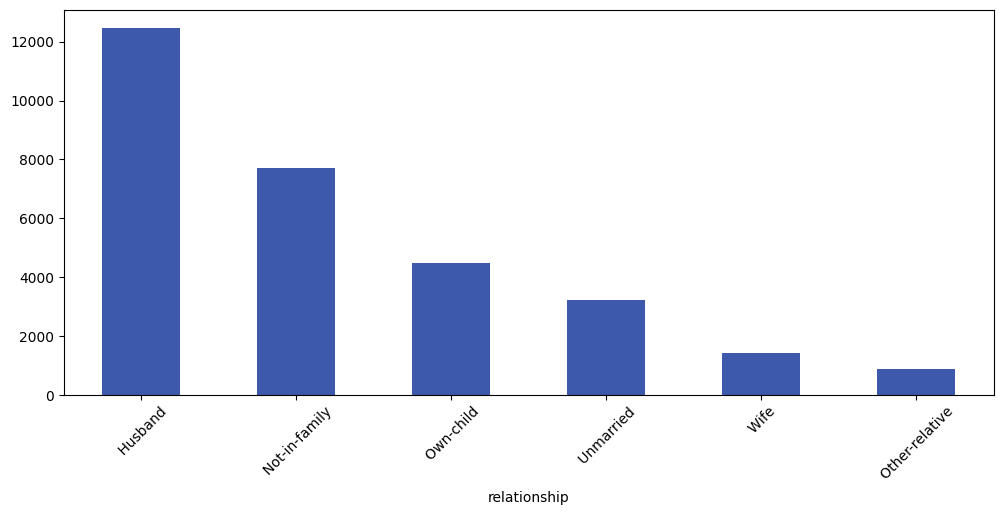

In [15]:
# relationship
plt.figure(figsize=(12,5))
train_data.relationship.value_counts().plot.bar(color='#3D59AB')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

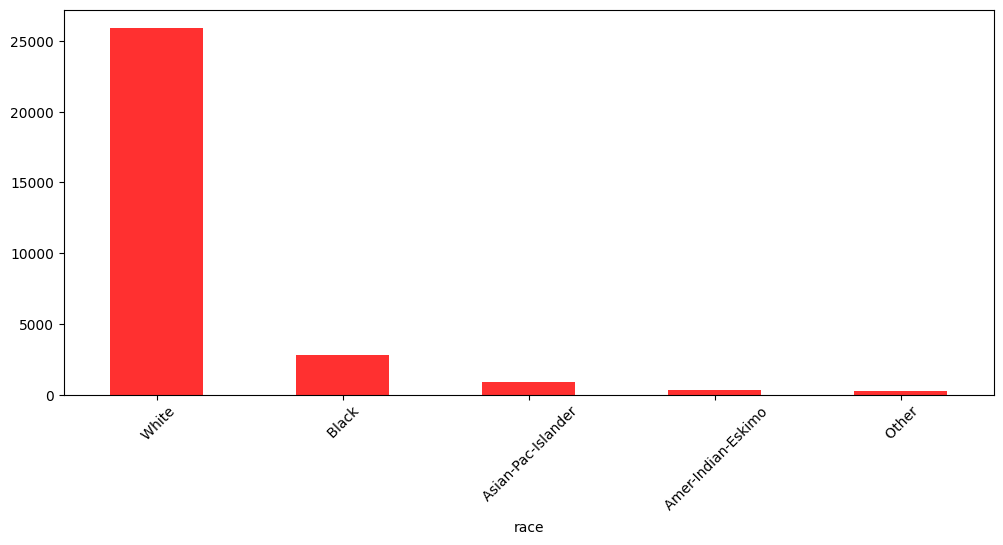

In [16]:
# race
plt.figure(figsize=(12,5))
train_data.race.value_counts().plot.bar(color='#FF3030')
plt.xticks(rotation=45)

<Axes: xlabel='sex'>

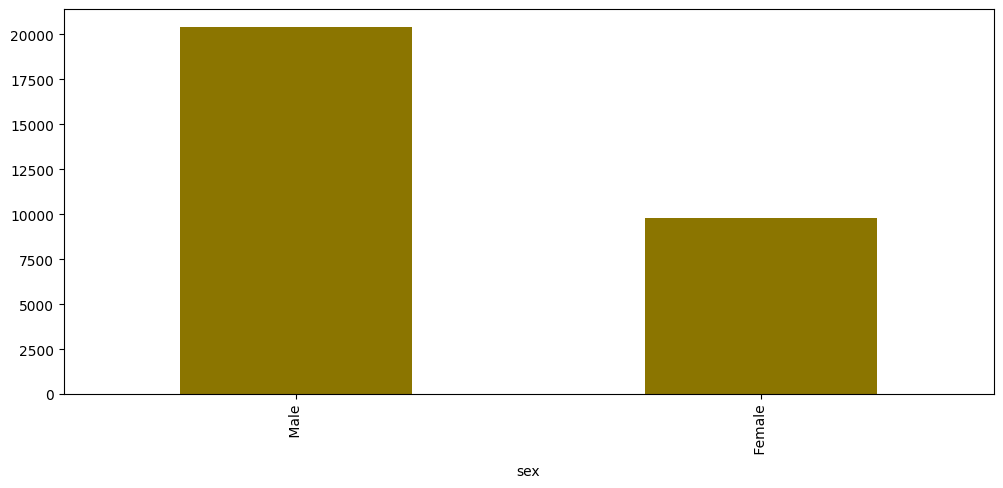

In [17]:
# Sex
plt.figure(figsize=(12,5))
train_data.sex.value_counts().plot.bar(color='#8B7500')

<Axes: xlabel='Salary'>

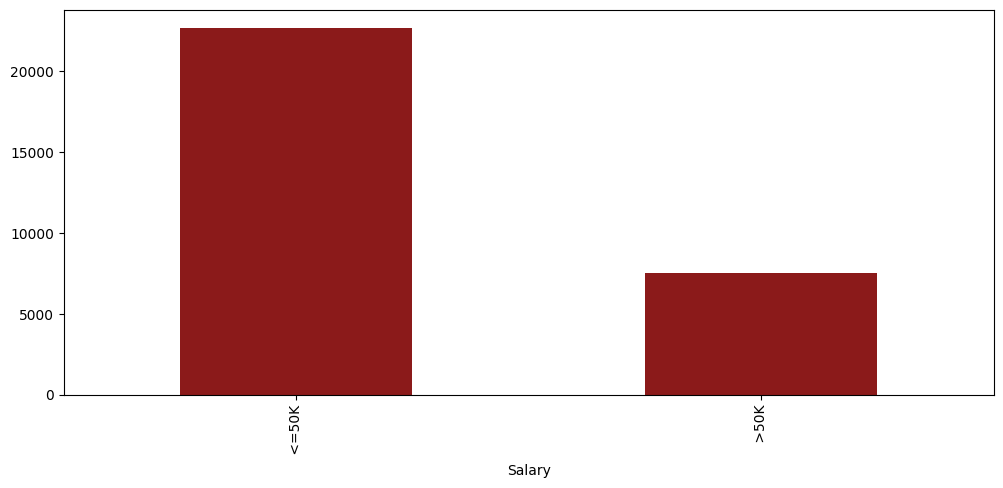

In [18]:
# Salary
plt.figure(figsize=(12,5))
train_data.Salary.value_counts().plot.bar(color='#8B1A1A')

In [19]:
train_data = train_data.drop('educationno', axis=1)
test_data = test_data.drop('educationno', axis=1)

In [20]:
label_encoder = LabelEncoder()
categorical_cols = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']
for col in categorical_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])
    test_data[col] = label_encoder.transform(test_data[col])

In [21]:
X_train = train_data.drop('Salary', axis=1)
y_train = train_data['Salary']
X_test = test_data.drop('Salary', axis=1)
y_test = test_data['Salary']

In [22]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [23]:
y_pred = model.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7915006640106241


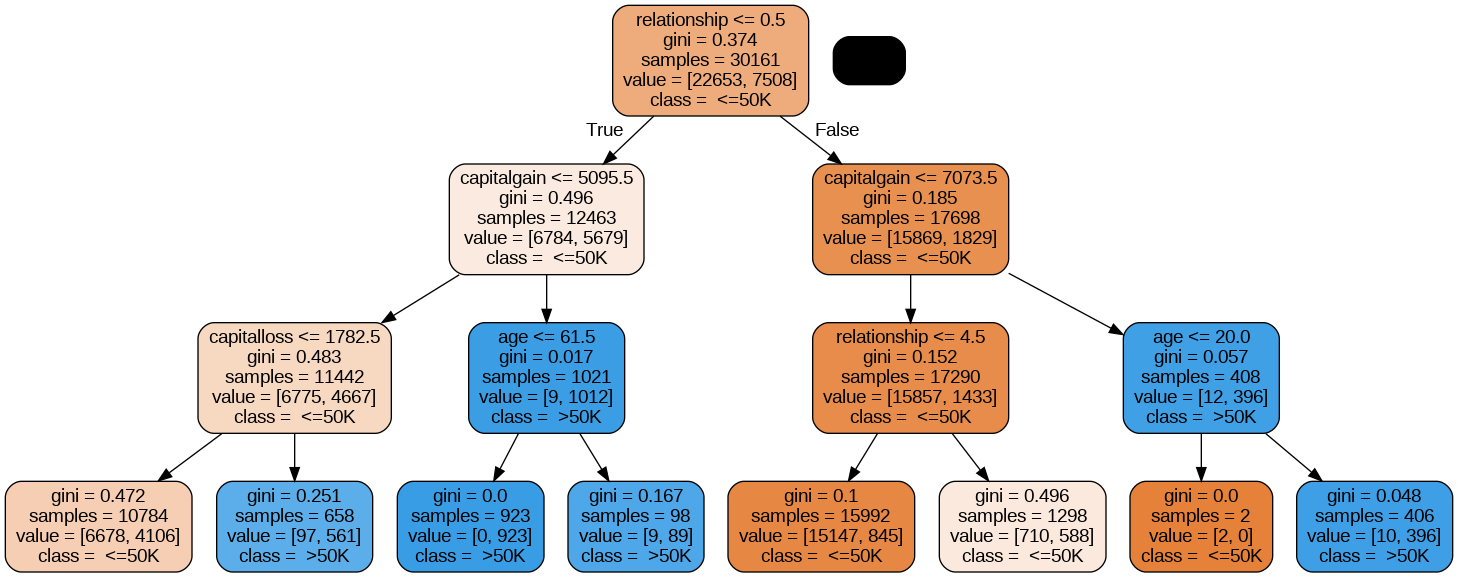

In [25]:
tree_est = tree.DecisionTreeClassifier(max_depth=3)
tree_est.fit(X_train, y_train)

dot_data = export_graphviz(tree_est, out_file=None,
                           feature_names=X_train.columns,
                           class_names=model.classes_,
                           filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())